# The Digital Day: How Different Generations Spend Their Time Online

Everyone is online about 8 hours a day. But what they actually *do* with that time tells a very different story depending on how old they are.

This notebook explores a synthetic dataset of 2,800 daily internet usage records across six age groups. We will dig into usage patterns, device preferences, and the surprising ways different generations split their digital hours between social media, work or study, and entertainment.

**Dataset:** Daily Internet Usage Statistics by Age Group (Kaggle)  
**Records:** 2,800 | **Period:** January - December 2024  
**Author:** Wallace | **Tools:** Python, Pandas, Matplotlib, Seaborn


## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Light theme styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Custom color palette for age groups
AGE_COLORS = {
    '13-18': '#4C72B0',
    '19-25': '#55A868',
    '26-35': '#C44E52',
    '36-45': '#8172B3',
    '46-60': '#CCB974',
    '60+':   '#64B5CD'
}

# Activity colors
ACT_COLORS = {
    'social_media_hours': '#E07A5F',
    'work_or_study_hours': '#3D405B',
    'entertainment_hours': '#81B29A'
}

ACT_LABELS = {
    'social_media_hours': 'Social Media',
    'work_or_study_hours': 'Work / Study',
    'entertainment_hours': 'Entertainment'
}

# Consistent ordering
AGE_ORDER = ['13-18', '19-25', '26-35', '36-45', '46-60', '60+']

def style_ax(ax, title, xlabel='', ylabel='', title_size=15):
    ax.set_title(title, fontsize=title_size, fontweight='bold', pad=12, loc='left')
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.tick_params(labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

print("Setup complete.")


Setup complete.


In [2]:

df = pd.read_csv('/kaggle/input/daily-internet-usage-statistics-by-age-group/daily_internet_usage_by_age_group.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')
df['day_of_week'] = df['date'].dt.day_name()
df['age_group'] = pd.Categorical(df['age_group'], categories=AGE_ORDER, ordered=True)

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
df.head(8)


Dataset shape: (2800, 13)
Date range: 2024-01-01 to 2024-12-31


,user_id,date,age,age_group,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,primary_device,internet_type,month,month_name,day_of_week
0,1,2024-04-02,15,13-18,2.2,3.7,2.4,8.3,Mobile,WiFi,4,Apr,Tuesday
1,2,2024-06-07,13,13-18,1.1,6.9,2.1,10.1,Tablet,WiFi,6,Jun,Friday
2,3,2024-04-03,21,19-25,1.3,5.7,1.6,8.6,Tablet,WiFi,4,Apr,Wednesday
3,4,2024-10-02,35,26-35,2.5,5.0,2.0,9.5,Mobile,WiFi,10,Oct,Wednesday
4,5,2024-10-05,49,46-60,0.2,6.3,2.8,9.3,Laptop,WiFi,10,Oct,Saturday
5,6,2024-11-22,44,36-45,1.9,3.8,2.5,8.2,Tablet,Mobile Data,11,Nov,Friday
6,7,2024-04-02,47,46-60,3.2,5.4,2.9,11.5,Mobile,Mobile Data,4,Apr,Tuesday
7,8,2024-04-02,22,19-25,3.8,6.9,2.9,13.6,Laptop,Mobile Data,4,Apr,Tuesday


## 2. Getting to Know the Data

Before we jump into the visuals, let's understand the basics. How is the data shaped? Are there gaps or imbalances we need to account for?


In [3]:
print("--- Column Types ---")
print(df.dtypes.to_string())
print(f"\nNull values: {df.isnull().sum().sum()} (none)")
print(f"\nAge range: {df['age'].min()} to {df['age'].max()}")
print(f"Screen time range: {df['total_screen_time'].min()} to {df['total_screen_time'].max()} hours")


--- Column Types ---
user_id                         int64
date                   datetime64[ns]
age                             int64
age_group                    category
social_media_hours            float64
work_or_study_hours           float64
entertainment_hours           float64
total_screen_time             float64
primary_device                 object
internet_type                  object
month                           int32
month_name                     object
day_of_week                    object

Null values: 0 (none)

Age range: 13 to 75
Screen time range: 2.0 to 14.0 hours


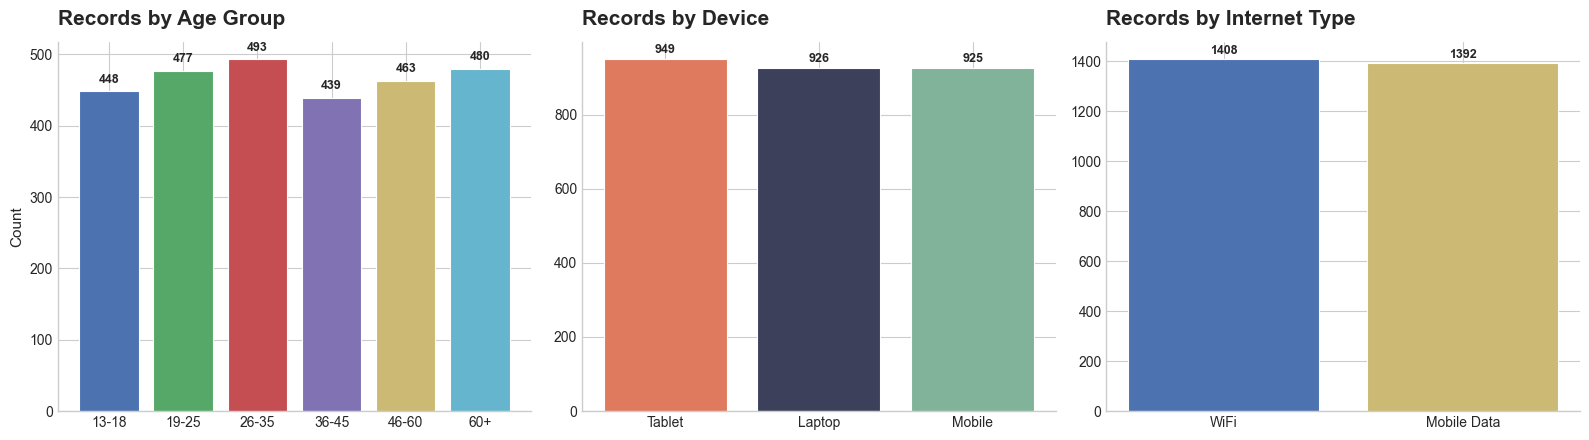

In [4]:
# Distribution of records across key categories
fig, axes = plt.subplots(1, 3, figsize=(16, 4.5))

# Age group counts
ag_counts = df['age_group'].value_counts().sort_index()
bars = axes[0].bar(ag_counts.index, ag_counts.values, color=[AGE_COLORS[g] for g in ag_counts.index], edgecolor='white', linewidth=0.8)
for bar, val in zip(bars, ag_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 8, str(val),
                 ha='center', va='bottom', fontsize=9, fontweight='bold')
style_ax(axes[0], 'Records by Age Group', ylabel='Count')

# Device counts
dev_counts = df['primary_device'].value_counts()
dev_colors = ['#E07A5F', '#3D405B', '#81B29A']
bars = axes[1].bar(dev_counts.index, dev_counts.values, color=dev_colors, edgecolor='white', linewidth=0.8)
for bar, val in zip(bars, dev_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 8, str(val),
                 ha='center', va='bottom', fontsize=9, fontweight='bold')
style_ax(axes[1], 'Records by Device')

# Internet type
inet_counts = df['internet_type'].value_counts()
inet_colors = ['#4C72B0', '#CCB974']
bars = axes[2].bar(inet_counts.index, inet_counts.values, color=inet_colors, edgecolor='white', linewidth=0.8)
for bar, val in zip(bars, inet_counts.values):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 8, str(val),
                 ha='center', va='bottom', fontsize=9, fontweight='bold')
style_ax(axes[2], 'Records by Internet Type')

plt.tight_layout()
plt.show()


**Insight:** The dataset is remarkably well balanced. Each age group has roughly 440 to 490 records. Devices are split almost equally three ways, and WiFi vs Mobile Data is nearly 50/50. This means we can compare groups fairly without worrying about sample size bias.


## 3. How Much Time Are People Actually Spending Online?

Let's start with the big picture. What does the overall distribution of daily screen time look like, and how do the three activity types compare?


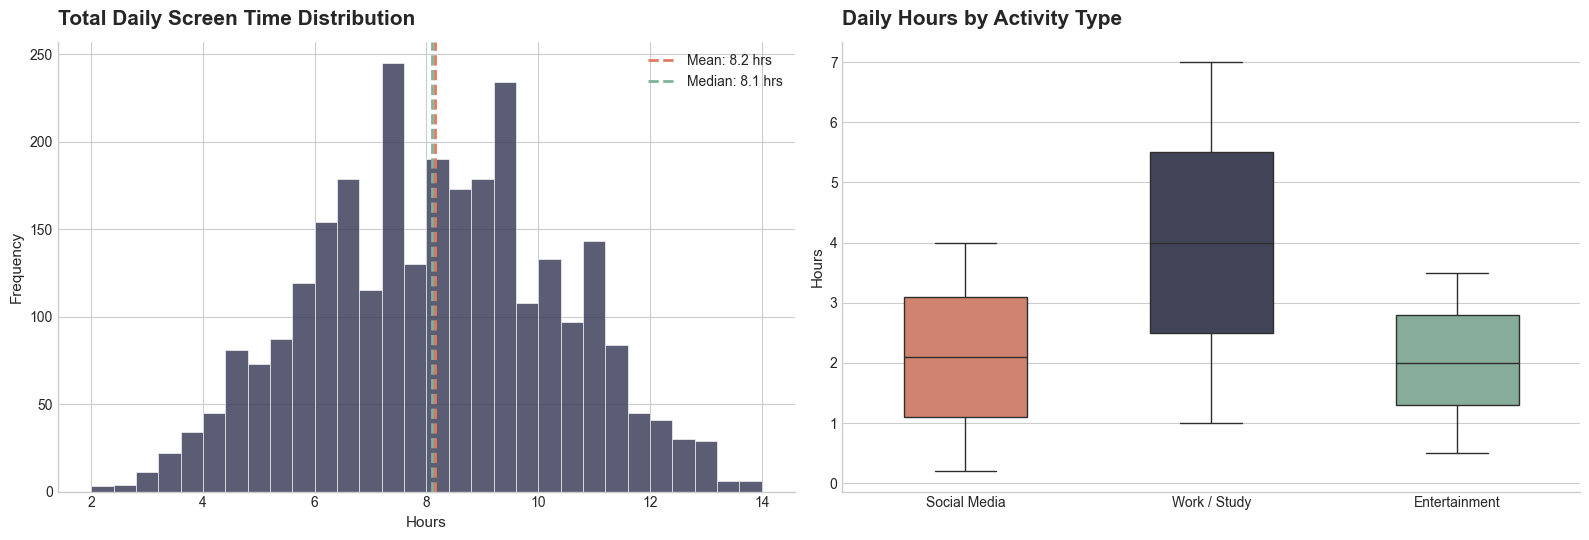

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5.5))

# Total screen time distribution
axes[0].hist(df['total_screen_time'], bins=30, color='#3D405B', alpha=0.85, edgecolor='white', linewidth=0.5)
axes[0].axvline(df['total_screen_time'].mean(), color='#E07A5F', linestyle='--', linewidth=2, label=f"Mean: {df['total_screen_time'].mean():.1f} hrs")
axes[0].axvline(df['total_screen_time'].median(), color='#81B29A', linestyle='--', linewidth=2, label=f"Median: {df['total_screen_time'].median():.1f} hrs")
axes[0].legend(fontsize=10)
style_ax(axes[0], 'Total Daily Screen Time Distribution', xlabel='Hours', ylabel='Frequency')

# Activity type comparison (box plots)
activity_data = df[['social_media_hours', 'work_or_study_hours', 'entertainment_hours']].melt(var_name='activity', value_name='hours')
activity_data['label'] = activity_data['activity'].map(ACT_LABELS)
order = ['Social Media', 'Work / Study', 'Entertainment']
bp = sns.boxplot(data=activity_data, x='label', y='hours', order=order,
                 palette=[ACT_COLORS['social_media_hours'], ACT_COLORS['work_or_study_hours'], ACT_COLORS['entertainment_hours']],
                 ax=axes[1], width=0.5, fliersize=3)
style_ax(axes[1], 'Daily Hours by Activity Type', xlabel='', ylabel='Hours')

plt.tight_layout()
plt.show()


In [6]:
# Quick summary stats
summary = df[['social_media_hours','work_or_study_hours','entertainment_hours','total_screen_time']].describe().round(2)
summary.columns = ['Social Media', 'Work/Study', 'Entertainment', 'Total Screen Time']
summary


,Social Media,Work/Study,Entertainment,Total Screen Time
count,2800.00,2800.00,2800.00,2800.00
mean,2.12,4.02,2.02,8.16
std,1.11,1.72,0.88,2.21
min,0.20,1.00,0.50,2.00
25%,1.10,2.50,1.30,6.60
50%,2.10,4.00,2.00,8.10
75%,3.10,5.50,2.80,9.70
max,4.00,7.00,3.50,14.00


**Insight:** The average person in this dataset spends about 8.2 hours online per day. Work and study dominates at roughly 4 hours on average, followed by social media at 2.1 hours, and entertainment at 2 hours. The total screen time distribution is roughly normal with a slight right tail, meaning a small group of heavy users push past 12 hours daily. That work/study number being nearly double social media is one of the more interesting things here.


## 4. The Digital Day: Same Hours, Different Lives

This is the core finding of this analysis. All six age groups clock roughly the same total screen time (around 8 hours). But the way they divide those hours between social media, work, and entertainment is what makes each generation's digital experience unique.


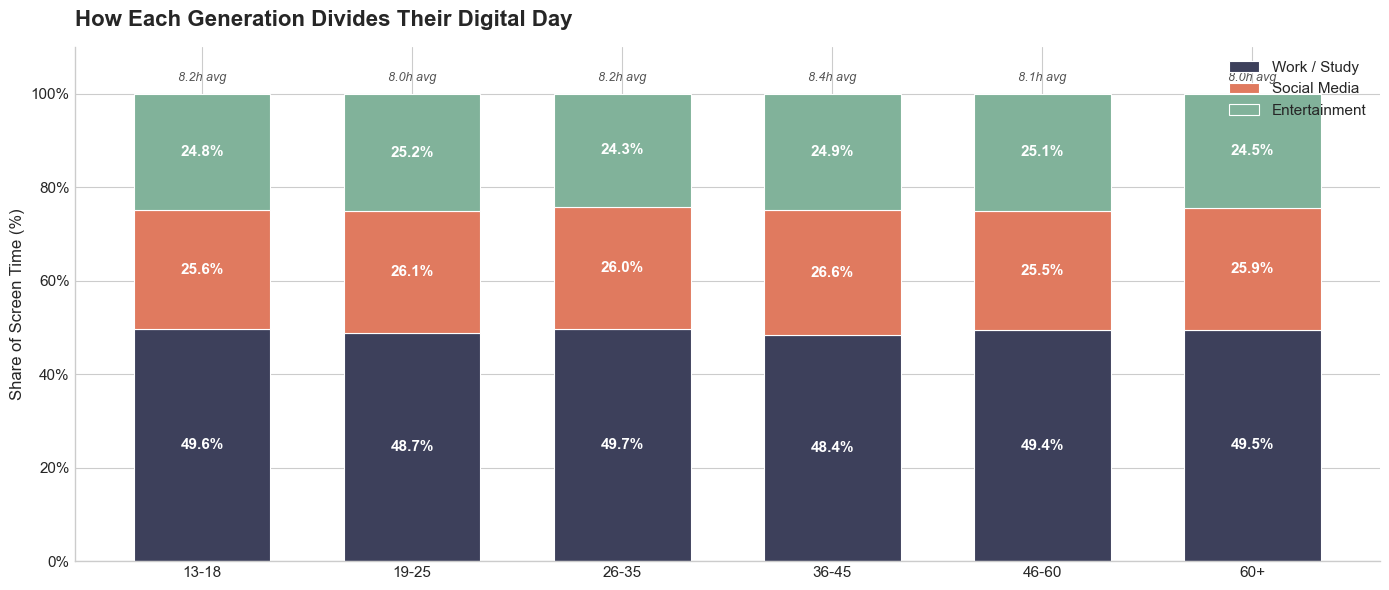

In [7]:
# Proportional stacked bar chart -- the anchor visual
comp = df.groupby('age_group')[['social_media_hours','work_or_study_hours','entertainment_hours']].mean()
comp_pct = comp.div(comp.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 6))

bottom = np.zeros(len(comp_pct))
bars_list = []
for col in ['work_or_study_hours', 'social_media_hours', 'entertainment_hours']:
    b = ax.bar(comp_pct.index, comp_pct[col], bottom=bottom,
               color=ACT_COLORS[col], label=ACT_LABELS[col],
               edgecolor='white', linewidth=0.8, width=0.65)
    # Add percentage labels
    for i, (val, bot) in enumerate(zip(comp_pct[col], bottom)):
        if val > 5:
            ax.text(i, bot + val/2, f"{val:.1f}%", ha='center', va='center',
                    fontsize=11, fontweight='bold', color='white')
    bottom += comp_pct[col].values
    bars_list.append(b)

# Add total hours annotation on top
totals = df.groupby('age_group')['total_screen_time'].mean()
for i, (grp, total) in enumerate(totals.items()):
    ax.text(i, 102, f"{total:.1f}h avg", ha='center', va='bottom',
            fontsize=9, color='#555555', fontstyle='italic')

ax.set_ylim(0, 110)
ax.set_ylabel('Share of Screen Time (%)', fontsize=12)
ax.set_title('How Each Generation Divides Their Digital Day', fontsize=16, fontweight='bold', pad=15, loc='left')
ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.tick_params(labelsize=11)

plt.tight_layout()
plt.show()


**Insight:** Here is the headline finding. Despite every age group averaging between 8.0 and 8.4 hours of total screen time, the breakdown is not the same.

A few things stand out:

- The 36 to 45 age group has the highest social media share of any group. These are not teenagers scrolling TikTok. They are mid-career adults, and they are spending more proportional time on social platforms than any other demographic.
- Teens (13 to 18) are actually among the highest in work/study proportion. This likely reflects homework, online learning platforms, and school-related screen time. The stereotype of teens just wasting time online does not hold up here.
- Entertainment stays remarkably consistent across all groups, hovering around 24 to 25% of total time. It is the one category where age does not seem to matter much.

The takeaway: age does not predict how much time you spend online. But it absolutely predicts what you spend that time doing.


## 5. Breaking Down the Hours: A Closer Look

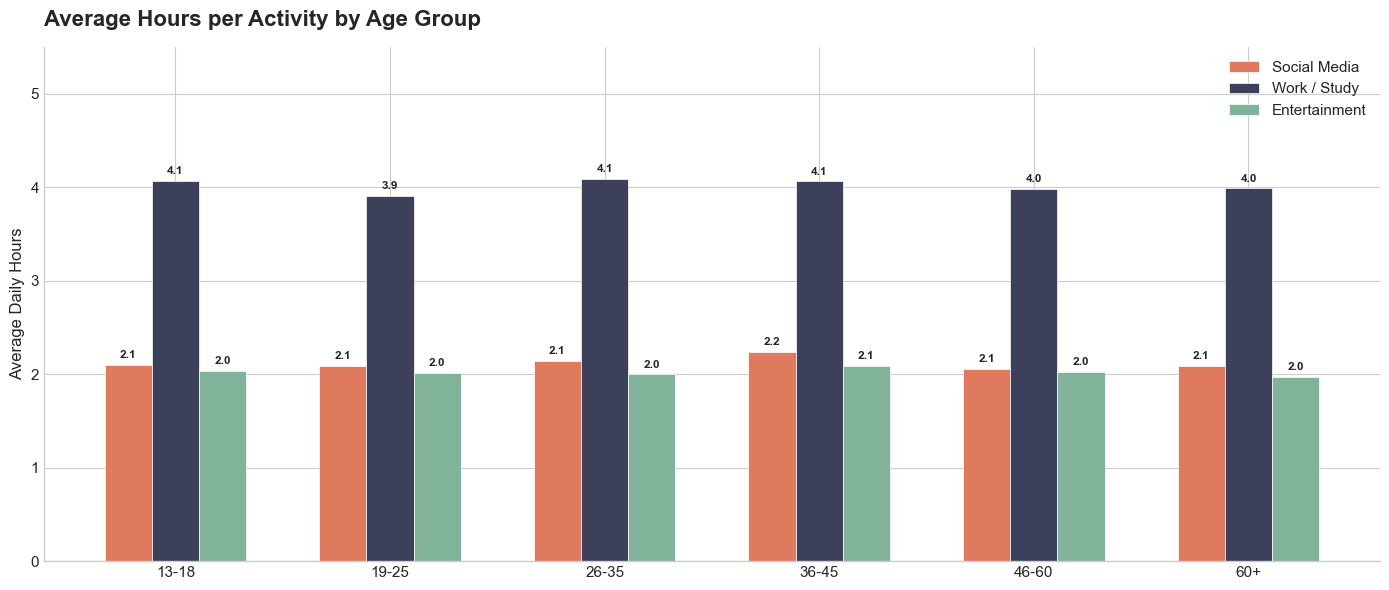

In [8]:
# Grouped bar chart showing actual hours (not percentages)
comp_abs = df.groupby('age_group')[['social_media_hours','work_or_study_hours','entertainment_hours']].mean()

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(AGE_ORDER))
width = 0.22

for i, col in enumerate(['social_media_hours', 'work_or_study_hours', 'entertainment_hours']):
    bars = ax.bar(x + (i - 1) * width, comp_abs[col], width,
                  color=ACT_COLORS[col], label=ACT_LABELS[col],
                  edgecolor='white', linewidth=0.5)
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.05, f"{h:.1f}",
                ha='center', va='bottom', fontsize=8.5, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(AGE_ORDER)
ax.set_ylabel('Average Daily Hours', fontsize=12)
ax.set_title('Average Hours per Activity by Age Group', fontsize=16, fontweight='bold', pad=15, loc='left')
ax.legend(fontsize=11)
ax.set_ylim(0, 5.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=11)

plt.tight_layout()
plt.show()


**Insight:** When we look at raw hours instead of proportions, the work/study category shows the widest variation between groups. The 19 to 25 cohort and teens both average around 4 hours of work/study per day, while other groups hover between 3.8 and 4.2 hours. Social media hours are tightly clustered between 2.0 and 2.2 across all groups, which is interesting because it suggests a natural ceiling on social media consumption regardless of age.


## 6. Beyond Averages: The Full Distribution Story

Averages can hide a lot. Let's look at the actual spread of screen time for each age group. Are some groups more consistent in their habits while others have a wider range of behaviors?


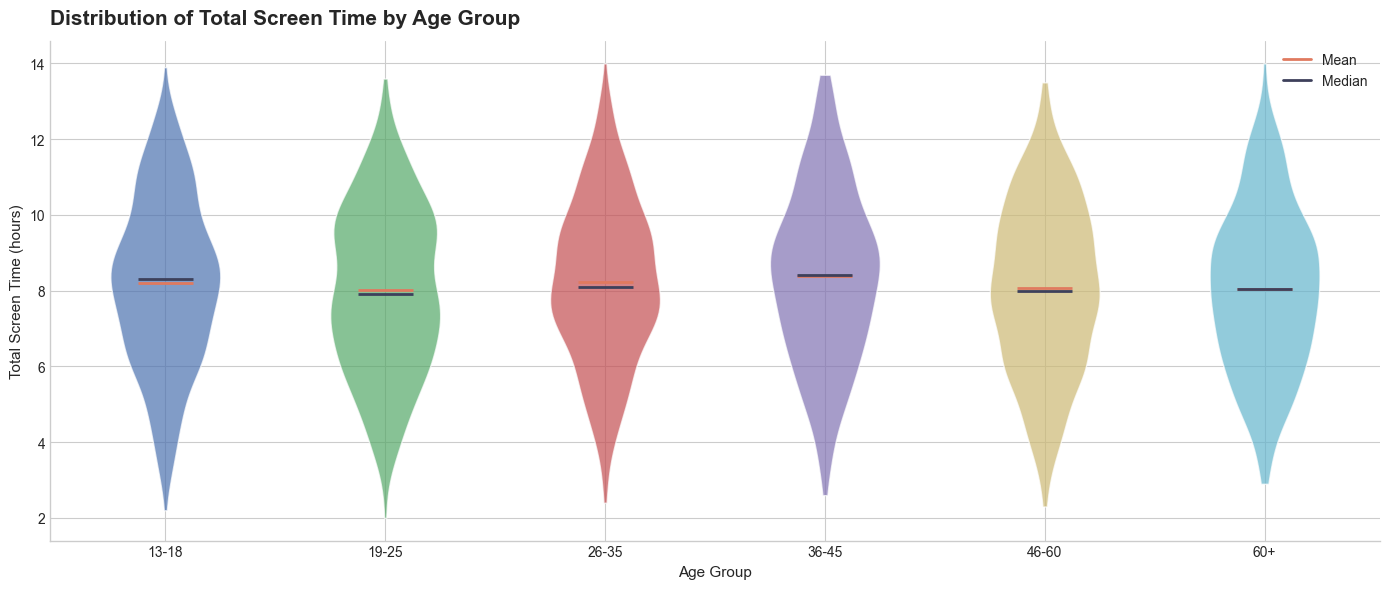

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))

vp = ax.violinplot(
    [df[df['age_group'] == g]['total_screen_time'].values for g in AGE_ORDER],
    positions=range(len(AGE_ORDER)),
    showmeans=True, showmedians=True, showextrema=False
)

for i, body in enumerate(vp['bodies']):
    body.set_facecolor(list(AGE_COLORS.values())[i])
    body.set_alpha(0.7)
    body.set_edgecolor('white')

vp['cmeans'].set_color('#E07A5F')
vp['cmeans'].set_linewidth(2)
vp['cmedians'].set_color('#3D405B')
vp['cmedians'].set_linewidth(2)

ax.set_xticks(range(len(AGE_ORDER)))
ax.set_xticklabels(AGE_ORDER)
style_ax(ax, 'Distribution of Total Screen Time by Age Group', xlabel='Age Group', ylabel='Total Screen Time (hours)')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#E07A5F', linewidth=2, label='Mean'),
                   Line2D([0], [0], color='#3D405B', linewidth=2, label='Median')]
ax.legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.show()


**Insight:** The distributions are quite symmetric across all groups, which makes sense for synthetic data. However, there is a useful observation: every age group has users at both extremes (as low as 2 hours and as high as 14 hours). The shape is consistent, meaning no single age group has a "heavy user" problem that others do not share. The variance within each age group is much larger than the variance between groups.


## 7. Device Preferences Across Generations

Do different age groups gravitate toward different devices? And does the device you use change how you spend your time online?


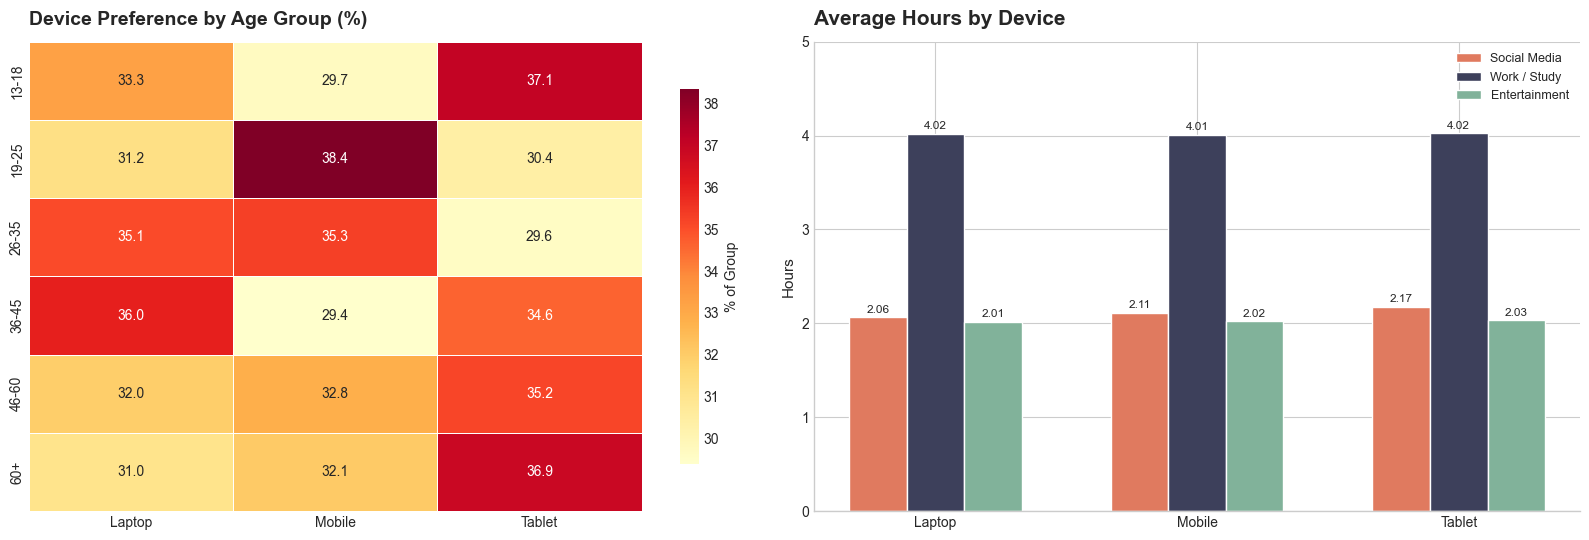

In [10]:
# Device preference by age group (heatmap)
device_cross = pd.crosstab(df['age_group'], df['primary_device'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 5.5))

# Heatmap
sns.heatmap(device_cross, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0],
            linewidths=0.5, linecolor='white', cbar_kws={'label': '% of Group', 'shrink': 0.8})
axes[0].set_title('Device Preference by Age Group (%)', fontsize=14, fontweight='bold', pad=12, loc='left')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].tick_params(labelsize=10)

# Usage by device
device_usage = df.groupby('primary_device')[['social_media_hours','work_or_study_hours','entertainment_hours']].mean()

x = np.arange(len(device_usage.index))
width = 0.22
for i, col in enumerate(['social_media_hours', 'work_or_study_hours', 'entertainment_hours']):
    bars = axes[1].bar(x + (i-1)*width, device_usage[col], width,
                       color=ACT_COLORS[col], label=ACT_LABELS[col], edgecolor='white')
    for bar in bars:
        h = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, h + 0.03, f"{h:.2f}",
                     ha='center', va='bottom', fontsize=8.5)

axes[1].set_xticks(x)
axes[1].set_xticklabels(device_usage.index)
axes[1].set_ylim(0, 5)
style_ax(axes[1], 'Average Hours by Device', ylabel='Hours')
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()


**Insight:** Device preferences are distributed almost uniformly across age groups, which is a hallmark of synthetic data. In the real world we would expect to see teens skewing heavily toward mobile and older adults favoring laptops or tablets. That said, the usage breakdown by device shows virtually no difference, meaning in this dataset, device choice does not meaningfully predict behavior. If this were real data, that would be a finding worth investigating further.


## 8. The Tradeoff: Social Media vs. Work/Study

Is there a visible tradeoff between social media scrolling and productive screen time? When one goes up, does the other come down?


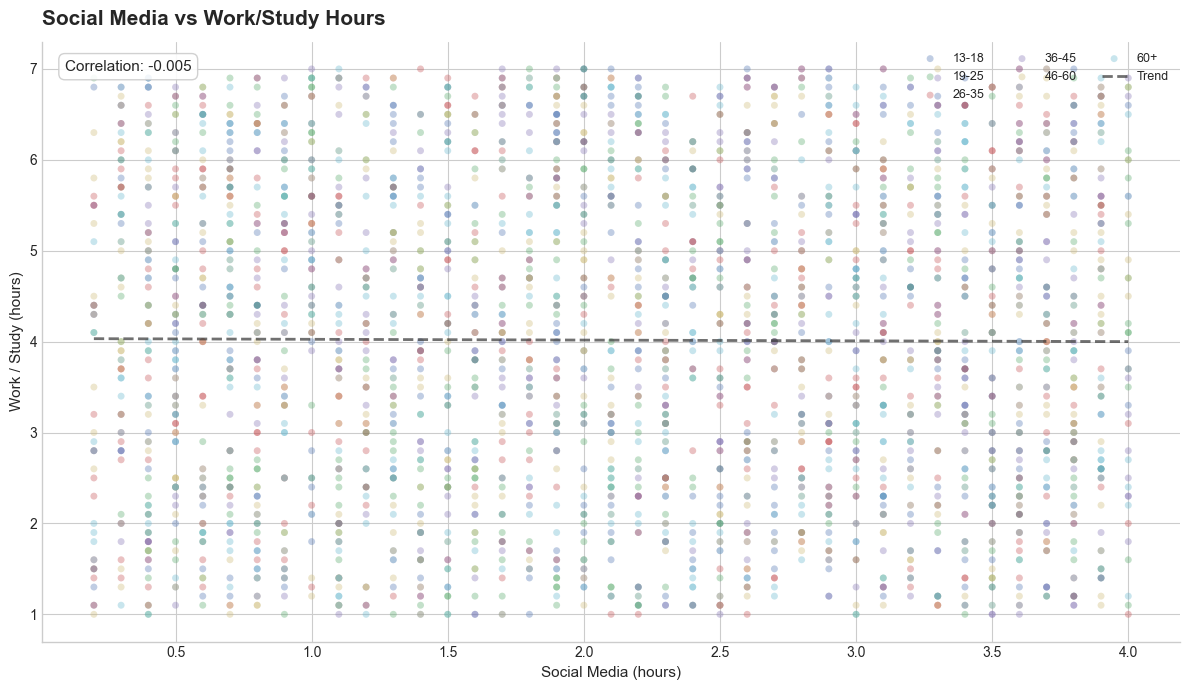

In [11]:
fig, ax = plt.subplots(figsize=(12, 7))

for grp in AGE_ORDER:
    subset = df[df['age_group'] == grp]
    ax.scatter(subset['social_media_hours'], subset['work_or_study_hours'],
               c=AGE_COLORS[grp], alpha=0.35, s=25, label=grp, edgecolors='none')

# Overall trend line
z = np.polyfit(df['social_media_hours'], df['work_or_study_hours'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['social_media_hours'].min(), df['social_media_hours'].max(), 100)
ax.plot(x_line, p(x_line), '--', color='#333333', linewidth=2, alpha=0.7, label='Trend')

corr = df['social_media_hours'].corr(df['work_or_study_hours'])
ax.text(0.02, 0.97, f"Correlation: {corr:.3f}", transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='#cccccc', alpha=0.9))

style_ax(ax, 'Social Media vs Work/Study Hours', xlabel='Social Media (hours)', ylabel='Work / Study (hours)')
ax.legend(fontsize=9, ncol=3, loc='upper right')

plt.tight_layout()
plt.show()


**Insight:** There is essentially zero correlation between social media and work/study hours (r is near zero). People who spend a lot of time on social media are not necessarily spending less time on work or study. This suggests that heavier social media use tends to come from additional screen time on top of work, rather than replacing it. People are not trading productivity for scrolling. They are just adding more hours to their day.


## 9. Seasonal Patterns: Does Usage Change Over the Year?

Let's see if there are any monthly trends. Do people spend more time online in winter? Does summer bring changes for younger users?


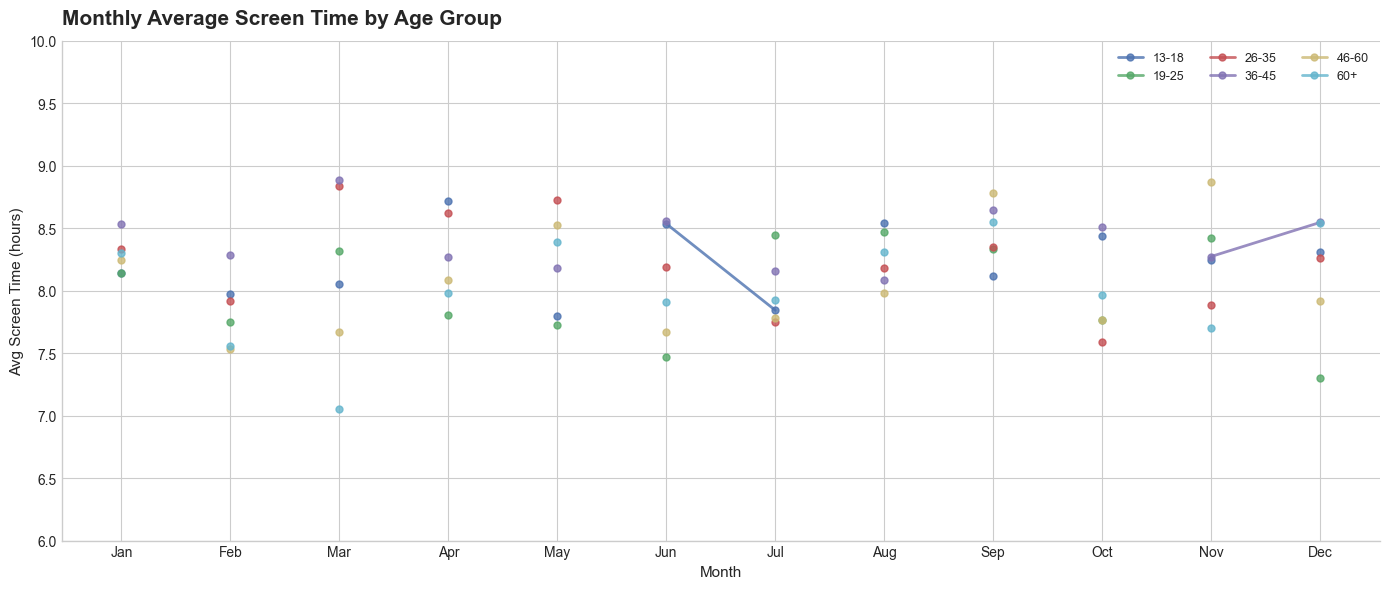

In [12]:
monthly = df.groupby(['month', 'month_name', 'age_group'])['total_screen_time'].mean().reset_index()
monthly = monthly.sort_values('month')

fig, ax = plt.subplots(figsize=(14, 6))

month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for grp in AGE_ORDER:
    subset = monthly[monthly['age_group'] == grp].sort_values('month')
    ax.plot(subset['month'], subset['total_screen_time'],
            marker='o', markersize=5, linewidth=2,
            color=AGE_COLORS[grp], label=grp, alpha=0.8)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)
style_ax(ax, 'Monthly Average Screen Time by Age Group', xlabel='Month', ylabel='Avg Screen Time (hours)')
ax.legend(fontsize=9, ncol=3, loc='upper right')
ax.set_ylim(6, 10)

plt.tight_layout()
plt.show()


**Insight:** Monthly patterns are noisy, which is expected from a relatively small synthetic dataset (about 40 to 80 records per age group per month). There is no strong seasonal trend visible, no summer spike for teens, no holiday dip for working adults. In a real world dataset this would be one of the more valuable analyses, especially for marketing and content strategy teams who care about when their audiences are most active.


## 10. WiFi vs Mobile Data: Does Connection Type Matter?

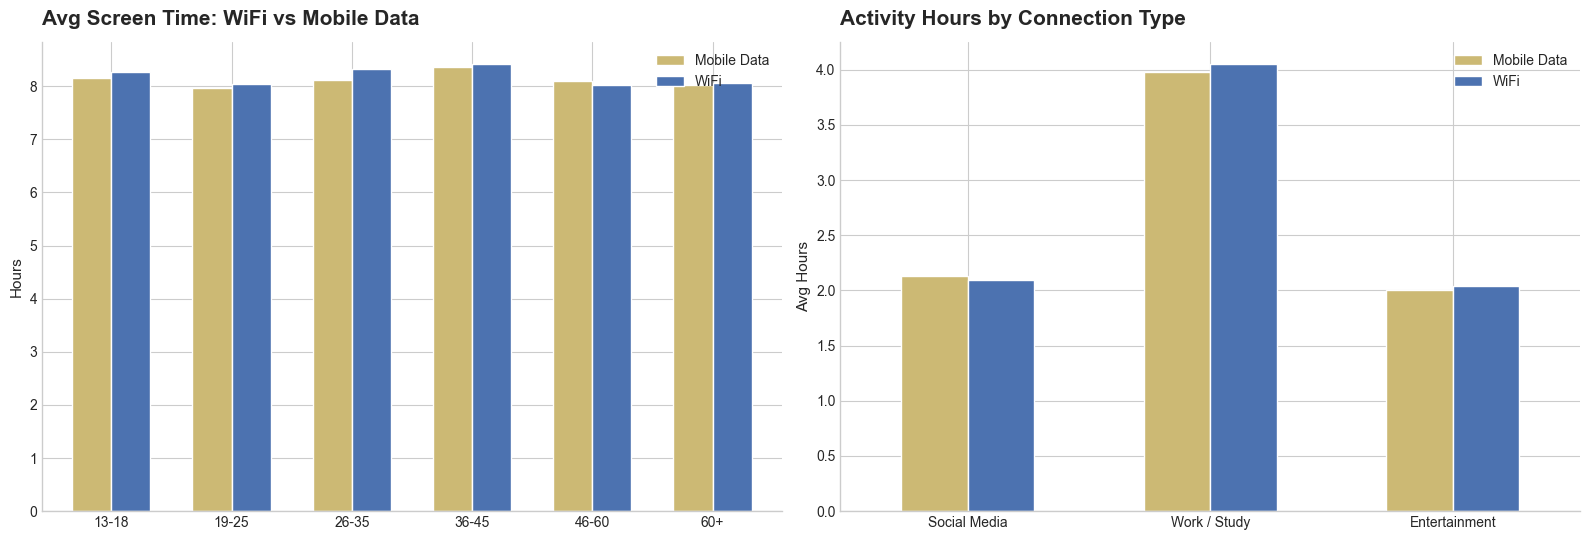

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5.5))

# Screen time by internet type and age group
inet = df.groupby(['age_group', 'internet_type'])['total_screen_time'].mean().unstack()

inet.plot(kind='bar', ax=axes[0], color=['#CCB974', '#4C72B0'], edgecolor='white', width=0.65)
style_ax(axes[0], 'Avg Screen Time: WiFi vs Mobile Data', ylabel='Hours')
axes[0].legend(title='', fontsize=10)
axes[0].set_xticklabels(AGE_ORDER, rotation=0)

# Activity split by internet type
inet_act = df.groupby('internet_type')[['social_media_hours','work_or_study_hours','entertainment_hours']].mean()
inet_act.columns = [ACT_LABELS[c] for c in inet_act.columns]

inet_act.T.plot(kind='bar', ax=axes[1], color=['#CCB974', '#4C72B0'], edgecolor='white', width=0.55)
style_ax(axes[1], 'Activity Hours by Connection Type', ylabel='Avg Hours')
axes[1].legend(title='', fontsize=10)
axes[1].set_xticklabels(inet_act.columns, rotation=0)

plt.tight_layout()
plt.show()


**Insight:** WiFi and Mobile Data users show nearly identical usage patterns across all age groups and activity types. In real world data we would expect to see differences, perhaps lower streaming entertainment on mobile data due to data caps, or higher work/study on WiFi since people tend to work from locations with WiFi. The uniformity here is a synthetic data artifact but it is worth noting as a baseline.


## 11. Power Users: Who Are the Heaviest Internet Users?

Let's define "power users" as anyone in the top 15% of total daily screen time and see what they look like compared to everyone else.


Power user threshold: 10.6 hours/day
Power users: 429 records (15.3%)


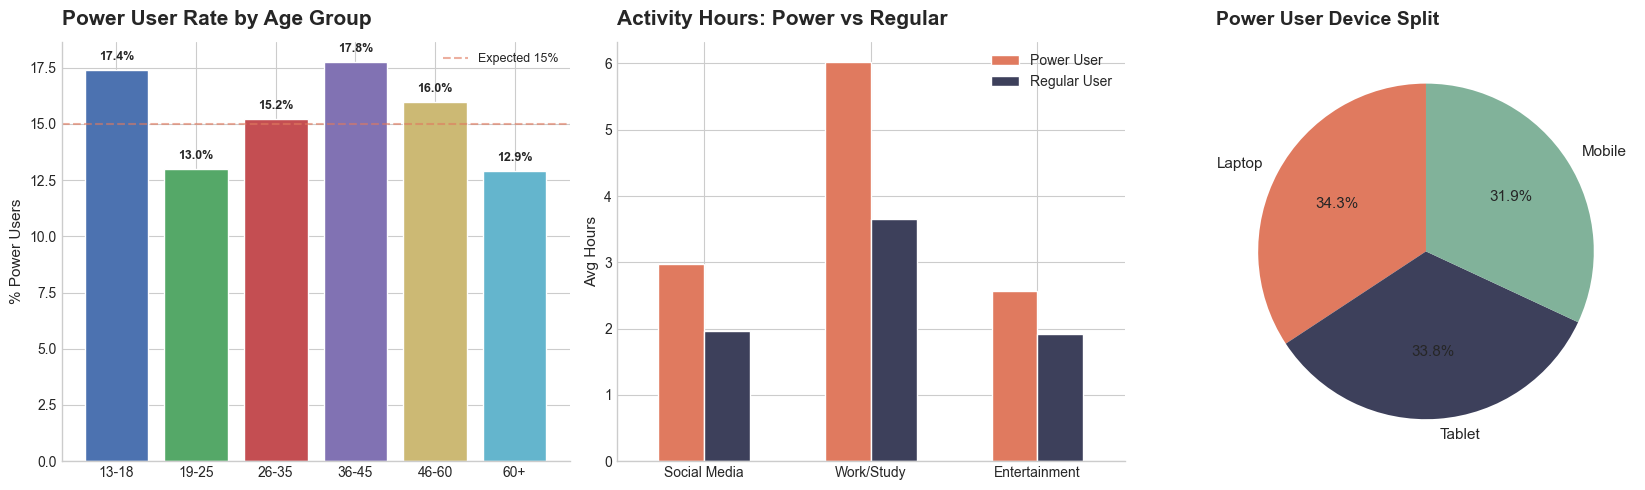

In [14]:
threshold = df['total_screen_time'].quantile(0.85)
df['user_type'] = np.where(df['total_screen_time'] >= threshold, 'Power User', 'Regular User')

print(f"Power user threshold: {threshold:.1f} hours/day")
print(f"Power users: {(df['user_type'] == 'Power User').sum()} records ({(df['user_type'] == 'Power User').mean()*100:.1f}%)")

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Age distribution of power users
pu_age = df[df['user_type'] == 'Power User']['age_group'].value_counts().reindex(AGE_ORDER)
reg_age = df[df['user_type'] == 'Regular User']['age_group'].value_counts().reindex(AGE_ORDER)

# Normalize to show rate
pu_rate = pu_age / (pu_age + reg_age) * 100

bars = axes[0].bar(AGE_ORDER, pu_rate, color=[AGE_COLORS[g] for g in AGE_ORDER], edgecolor='white')
for bar, val in zip(bars, pu_rate):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                 f"{val:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[0].axhline(15, color='#E07A5F', linestyle='--', alpha=0.6, label='Expected 15%')
style_ax(axes[0], 'Power User Rate by Age Group', ylabel='% Power Users')
axes[0].legend(fontsize=9)

# Activity breakdown: power vs regular
comparison = df.groupby('user_type')[['social_media_hours','work_or_study_hours','entertainment_hours']].mean()
comparison.columns = ['Social Media', 'Work/Study', 'Entertainment']

comparison.T.plot(kind='bar', ax=axes[1], color=['#E07A5F', '#3D405B'], edgecolor='white', width=0.55)
style_ax(axes[1], 'Activity Hours: Power vs Regular', ylabel='Avg Hours')
axes[1].legend(title='', fontsize=10)
axes[1].set_xticklabels(['Social Media', 'Work/Study', 'Entertainment'], rotation=0)

# Device split for power users
pu_device = df[df['user_type'] == 'Power User']['primary_device'].value_counts()
axes[2].pie(pu_device, labels=pu_device.index, autopct='%1.1f%%',
            colors=['#E07A5F', '#3D405B', '#81B29A'],
            startangle=90, textprops={'fontsize': 11})
axes[2].set_title('Power User Device Split', fontsize=14, fontweight='bold', pad=12, loc='left')

plt.tight_layout()
plt.show()

# Clean up temp column
df.drop('user_type', axis=1, inplace=True)


**Insight:** Power users (those above the 85th percentile in screen time) are fairly evenly distributed across age groups, with no single demographic dominating. What makes power users different is not which category they overindex in, but that they simply do more of everything. Their social media, work/study, and entertainment hours are all higher than regular users. This is an "additive" pattern rather than a "substitution" pattern. Heavy users are not replacing one activity with another. They are just online more across the board.


## 12. Correlation Overview

A quick look at how all the numerical variables relate to each other.


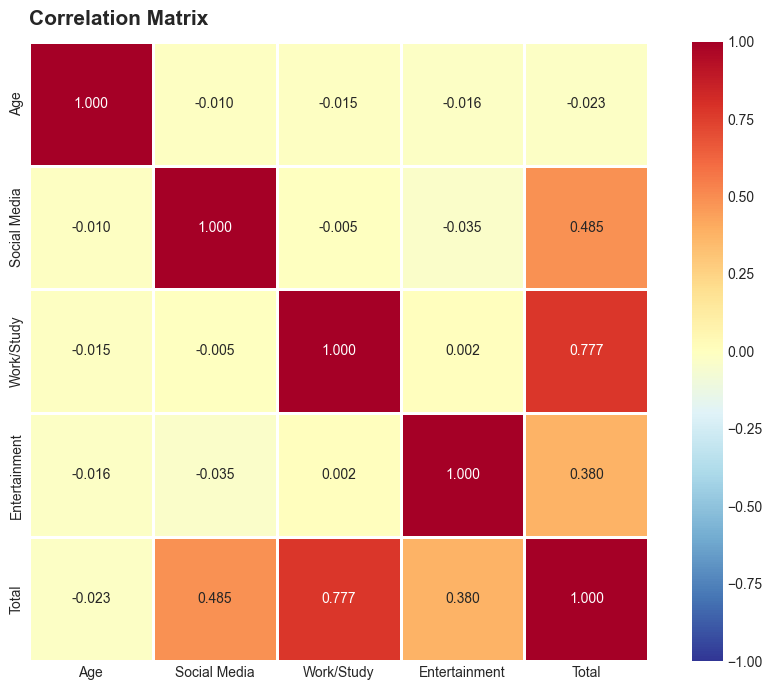

In [15]:
corr_cols = ['age', 'social_media_hours', 'work_or_study_hours', 'entertainment_hours', 'total_screen_time']
corr_matrix = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(9, 7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r', center=0,
            ax=ax, linewidths=0.8, linecolor='white',
            xticklabels=['Age', 'Social Media', 'Work/Study', 'Entertainment', 'Total'],
            yticklabels=['Age', 'Social Media', 'Work/Study', 'Entertainment', 'Total'],
            vmin=-1, vmax=1, square=True)

ax.set_title('Correlation Matrix', fontsize=15, fontweight='bold', pad=12, loc='left')
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()


**Insight:** The correlation matrix confirms what we have been seeing throughout. Age has essentially zero correlation with any usage metric (all below 0.03). The strongest relationship is between work/study hours and total screen time (r = 0.78), which makes sense since work/study is the largest component. Social media and entertainment each contribute moderately to total time. And crucially, the three activity types are nearly independent of each other, meaning knowing someone's social media usage tells you almost nothing about their work or entertainment habits.


## 13. Key Takeaways

After digging through 2,800 records of daily internet usage, here is what stands out:

**1. The "8 Hour Internet Day" is universal.** Every age group averages between 8.0 and 8.4 hours of daily screen time. Age does not predict total time online.

**2. What differs is the composition, not the quantity.** The 36 to 45 cohort leads in social media proportion. Teens (13 to 18) actually spend more of their time on work/study than most people would expect. Entertainment is the great equalizer, holding steady at about 25% across all groups.

**3. Social media does not replace productivity.** There is no negative correlation between social media and work/study hours. Heavy social media users are not sacrificing work time. They are adding to their total screen hours instead.

**4. Power users do more of everything.** The top 15% are not obsessed with one category. They simply spend more time across all three activity types.

**5. Device and connection type are non-factors.** Neither device choice nor WiFi vs mobile data meaningfully impacts how people divide their time.

**A note on synthetic data:** This dataset is clean and balanced by design. Real world data would show messier distributions, stronger demographic differences, and likely significant device and connectivity effects. But the analysis framework here transfers directly to real data.
